#  _<center> Life Expectancy and GDP Analysis </center>_

### _ <center> Introduction </center>_

### 🔎This project will examine whether a relationship exists between the GDP of six countries and the life expectancy of their populations.



#### The goals are to prepare data, EDA with plotting, share findings, and study the results. 

*Some of the questions this project will seek to answer are:*

- Has GDP increased over the years in all of the 6 nations?
- Has Life Expectancy rates at birth increased over the years in all of the 6 nations?
- Is there a correlation between GDP and Life at birth?
- What is the average Life expectancy in all of the nations?
- what is the average GDP in all of the 6 nations?
- how is the data distributed?

#### **Data Source:** 
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


### 📂 Importing requeired libraries .

In [ ]:
import csv 
import pandas as pd
import seaborn as sns
import numpy as np 
from scipy.stats import pearsonr
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

### ⛑️Creating Helper Fucntions
Creating functions to help visualize graphs 

In [59]:
def hist(data, x=None,title='', xlabel='', ylabel='', color=None, element='bars'):
    #create main figure
    plt.figure()
    
    #checking element parameter:
    if element != 'bars':
        sns.histplot(data=data, x=x, element='bars', kde=True, bins=20, color=color)
    else:
        sns.histplot(data=data, x=x, element='poly', kde=True, bins=96, color=color)
        
    # setting title and labels for the hist.    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.style.use('code/dark.mplstyle')
    plt.show()
    
    return 'Histogram Was Created!'
    
def scatter(data, x='', y='',x2='', y2='', ylabel='',title1='',title2='', subplot_title='', color=None, hue=''):
    #initlize custom style
    plt.style.use('code/dark.mplstyle')
    palette = sns.color_palette('Accent', n_colors=len(data['Country'].unique()))
    
    #create main figure and axis object.
    plt.figure(figsize=(20, 8))
    
    ax = plt.subplot(1, 2, 1)
    plt.suptitle(subplot_title, font='Arial', fontsize=20, y=0.9, x=0.5, va='bottom', color='#ab106d')
    scatterplot = sns.scatterplot(data=data, x=x, y=y, color=color, hue=hue, palette=palette)
    
    #setting up the titles and labels
    plt.title(title1)
    plt.ylabel(ylabel, labelpad=15)
    ax.get_legend().remove()  # Remove legend from the first subplot
    
    # create second scatterplot.
    plt.subplot(1, 2, 2)
    scatterplot = sns.scatterplot(data=data, x=x2, y=y2, hue=hue, palette=palette)
    
    plt.title(title2)
    plt.subplots_adjust(top=0.83, left=0.1, wspace=0.2)
    legend = scatterplot.get_legend()
    legend.get_frame().set_alpha(0.4)  # Adjust alpha for the legend
    
    plt.show(), plt.close('all')
    return 'Plot displayed successfully!'

def bar(data, x, y, yscale, title, palette, fill=True, color=None):
    '''a function that creates a bar plot ''' 
    
    fig = plt.figure(figsize=(12,5))
    plt.style.use('code/dark.mplstyle')
    sns.barplot(data=data, x=x, y=y, palette=palette)
    plt.title(title)
    
    plt.show(),plt.close('all')
    
    return '---------'

### 🛠️Load data

Given a csv file `all_data.csv`, the dataset is loaded to a Pandas Dataframe , then the dataframe head will be printed to give an inspection about the dataset 

In [5]:
# read the dataset 
df = pd.read_csv('all_data.csv')
df.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


To get a better understanding of the data , the data shape will be printed. 

In [6]:

print('shape:',df.shape, '\n')


shape: (96, 4) 



now it is noted that the data has 4 columns in total and 96 rows

### 📝Explore The data

To better understand the relationship between GDP and Life expectancy, we would need to explore the data, perform some summary statistics, and look for any null values (if exist).

In [7]:
# perform summry statics
print(df.describe(include='all'), '\n')


print(df.info(), '\n\n') # -> 4 ccolumns in total, 96 records(rows) in each column 

# check for null values :
print('\n null values:')
print(df.isnull().sum(), '\n\n') # -> 0 / no null values



         Country         Year  Life expectancy at birth (years)           GDP
count         96    96.000000                         96.000000  9.600000e+01
unique         6          NaN                               NaN           NaN
top     Zimbabwe          NaN                               NaN           NaN
freq          16          NaN                               NaN           NaN
mean         NaN  2007.500000                         72.789583  3.880499e+12
std          NaN     4.633971                         10.672882  5.197561e+12
min          NaN  2000.000000                         44.300000  4.415703e+09
25%          NaN  2003.750000                         74.475000  1.733018e+11
50%          NaN  2007.500000                         76.750000  1.280220e+12
75%          NaN  2011.250000                         78.900000  4.067510e+12
max          NaN  2015.000000                         81.000000  1.810000e+13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 

The data seems to have zero null values. in the next step, we will investigate the number of countries we are comparing and the range of years we are interested in. 

In [88]:
countries = df['Country'].unique()
print('num of Countries: ',*list(enumerate(countries)), '\n')
print('num of years in the data set:' , '\n', df['Year'].unique())

num of Countries:  (0, 'Chile') (1, 'China') (2, 'Germany') (3, 'Mexico') (4, 'USA') (5, 'Zimbabwe') 

num of years in the data set: 
 [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We are comparing the GDP and life expectency of *six* countries around the period from *2000-2015*

#### 🧹Cleaning columns

In [9]:
# Changing United States of Amercia to USA 
df['Country'] = df['Country'].replace('United States of America', 'USA',regex=True)
print(df['Country'].unique())

df = df.rename(columns={ 'Life expectancy at birth (years)' : 'LEABY'})

df

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


Looking back at the data, some columns names were too long especially when plotted
- The column `Life expectancy at Brith (years)` was changed to --> **LEABY**
- The column `United States of America` has been changed to --> **USA**

## 📊EDA and Plotting 

Distributed visualization can give quite handy insights into the data. Below, the frequency of GDP rates and LEABY will be shown. 

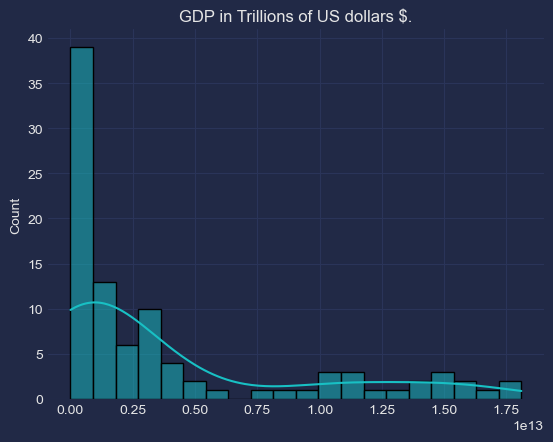

None
GDP: 
 count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64 



In [13]:
print(hist(data=df, x=df.GDP, title='GDP in Trillions of US dollars $.', element='poly'))
print('GDP:','\n', df['GDP'].describe(),'\n')


It appears that the data is right skewed as it is shown in the graph. 
This can tell us that there's there are relatively few data points on the right side.

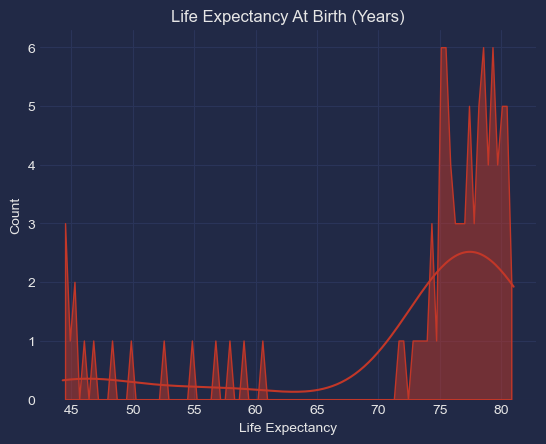

None
LEABY: count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: LEABY, dtype: float64
60.7


In [11]:
print(hist(data=df, x=df.LEABY, title='Life Expectancy At Birth (Years)', xlabel='Life Expectancy', color='#c23728'))
print('LEABY:',df['LEABY'].describe())
 
# checking if values [60-70] does exsists in the dataset :
noFreq_lst = [print(num) for num in df['LEABY'] if num > 60 and num < 70.2]


In contrary, when we look at the frequancy of Life expectancy in general we can see that the data is  skewed to the right . It is also noticable the absence of the values from the range *61-70* with 0 frequency in the dataset , this has been checked by a simple `for` loop above.

### 📈 LEABY vs GDP over the years .

A scatterplot was created to visualize the relationship between LEABY(Life expectancy at birth) and GDP over the years ***[2000 - 2015]***. 
It has been seen that in general, GDP and LEABY have been increasing over the years with some 
inconsistency at some of the periods. 
It is also seen that the year 2015 was the *peak point* for all 6 nations's GDP and LEABY.

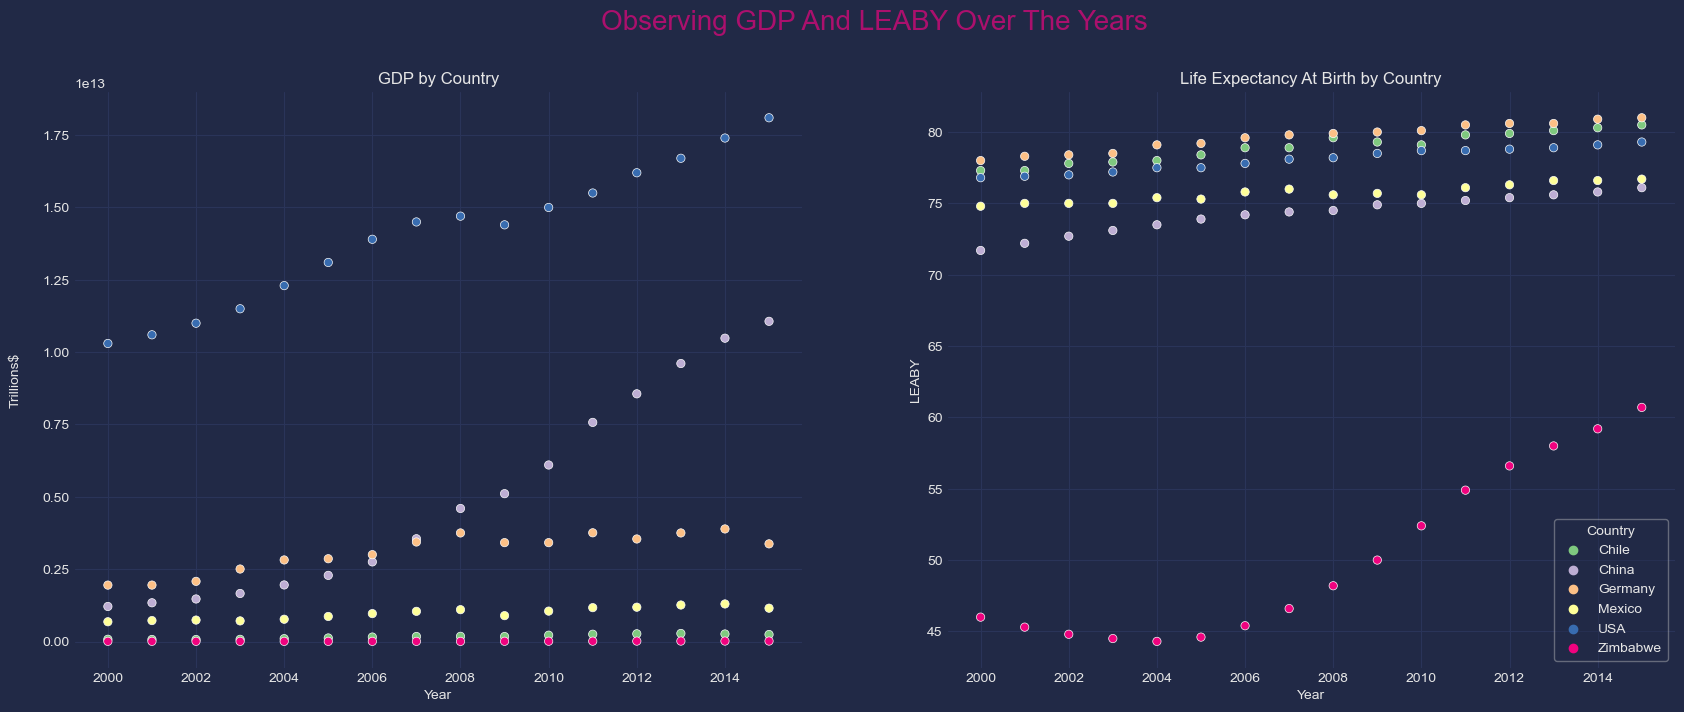

Plot displayed successfully!


In [60]:
print(scatter(df,x=df.Year, y=df.GDP, color='red',
                  hue='Country',
                  subplot_title='Observing GDP And LEABY Over The Years', ylabel='Trillions$',
                  title1='GDP by Country',
                  x2=df.Year, y2=df.LEABY, 
                  title2='Life Expectancy At Birth by Country'))


We need to also study the average LEABY and GDP per Country. A bar plot can help us achieve this.

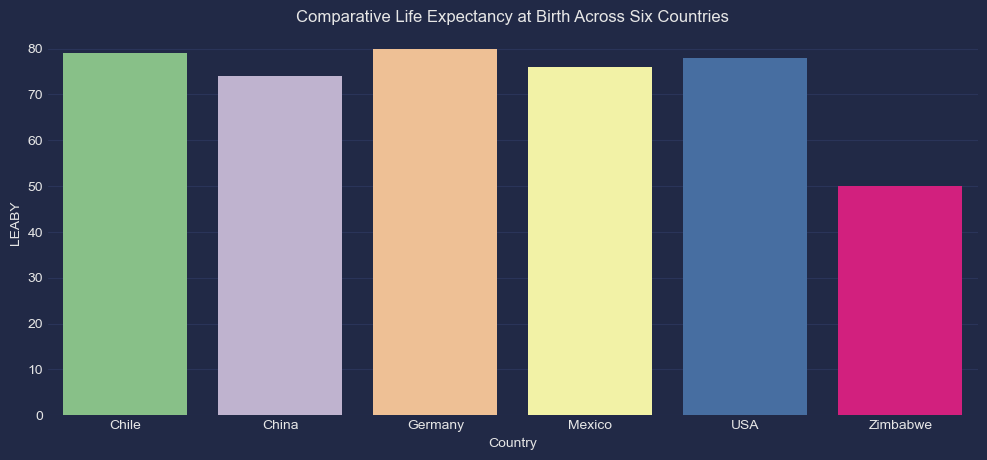

---------


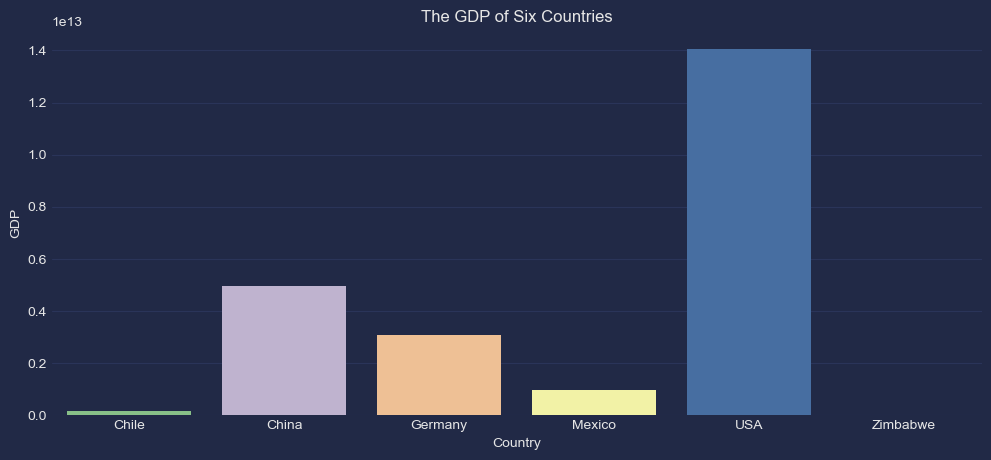

,Country,LEABY,GDP
0,Chile,79.0,1.697888e+11
1,China,74.0,4.957714e+12
2,Germany,80.0,3.094776e+12
3,Mexico,76.0,9.766506e+11
4,USA,78.0,1.407500e+13
5,Zimbabwe,50.0,9.062580e+09


In [56]:
def scatter(data, x='', y='', x2='', y2='', ylabel='', title1='', title2='', subplot_title='', color=None, hue=''):
    plt.style.use('code/dark.mplstyle')
    palette = sns.color_palette('Accent', n_colors=len(data['Country'].unique()))
    
    plt.figure(figsize=(20, 8))
    
    ax = plt.subplot(1, 2, 1)
    plt.suptitle(subplot_title, font='Arial', fontsize=20, y=0.9, x=0.5, va='bottom', color='#ab106d')
    scatterplot = sns.scatterplot(data=data, x=x, y=y, color=color, hue=hue, palette=palette)
    
    plt.title(title1)
    plt.ylabel(ylabel, labelpad=15)
    sns.move_legend(ax, 'upper left', bbox_to_anchor=(0, 2))
    ax.get_legend().remove()  # Remove legend from the first subplot
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x=x2, y=y2, hue=hue, palette=palette)
    sns.move_legend(ax, 'center left', bbox_to_anchor=(0, 0.4))
    
    plt.title(title2)
    plt.subplots_adjust(top=0.83, left=0.1, wspace=0.2)
    ax.get_legend().get_frame().set_alpha(0.4)  # Adjust alpha for the legend
    
    return plt.show(), plt.close('all')
# creating a new dataframe containing only the mean values of GDP,LEABY
dfMean = df.drop('Year', axis=1).groupby('Country').mean().round().reset_index(inplace=False)

bar_LEABY = bar(dfMean, x=dfMean.Country, y=dfMean.LEABY, palette='Accent', yscale='linear', title='Comparative Life Expectancy at Birth Across Six Countries')
print(bar_LEABY)

barGDP = bar(dfMean, x=dfMean.Country, 
             y=dfMean.GDP,title='The GDP of Six Countries' 
             , palette='Accent', yscale='linear')

#display the new dataframe
dfMean

It was noted that on average, the USA had the highest GDP along with having the third largest LEABY while Zimbebwe, on the other hand, is shown to have the lowest GDP of all the other nations with an invisible bar on the graph due to its minimal value compared to other countries worth to mention that zimbebwe is also the least country with a LEABY. Regarding the bar chart, Chile is also barely noticeable in the graph due to being the second lowest GDP. 
- 💡This indicates that there could be a possible relationship between the GDP and The life expectancy at birth rates. 

🔴**To investigate this further, a comparison of each country's GDP and LEABY will be created using a scatterplot**

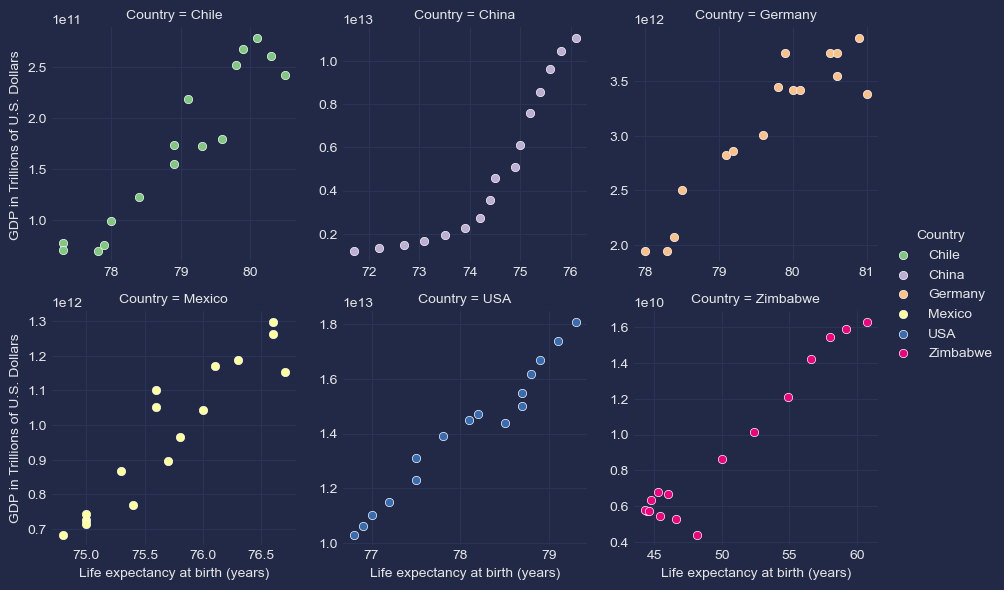

In [90]:
plt.style.use('code/dark.mplstyle')
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False, palette='Accent')
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

#### **It looks like there might be a relation between the two variables [GDP, LEABY]. However, in terms of correlation, we need to investigate the results more**
🔲 we will add a reg line to the same graph to better visualize if a correlation exists.

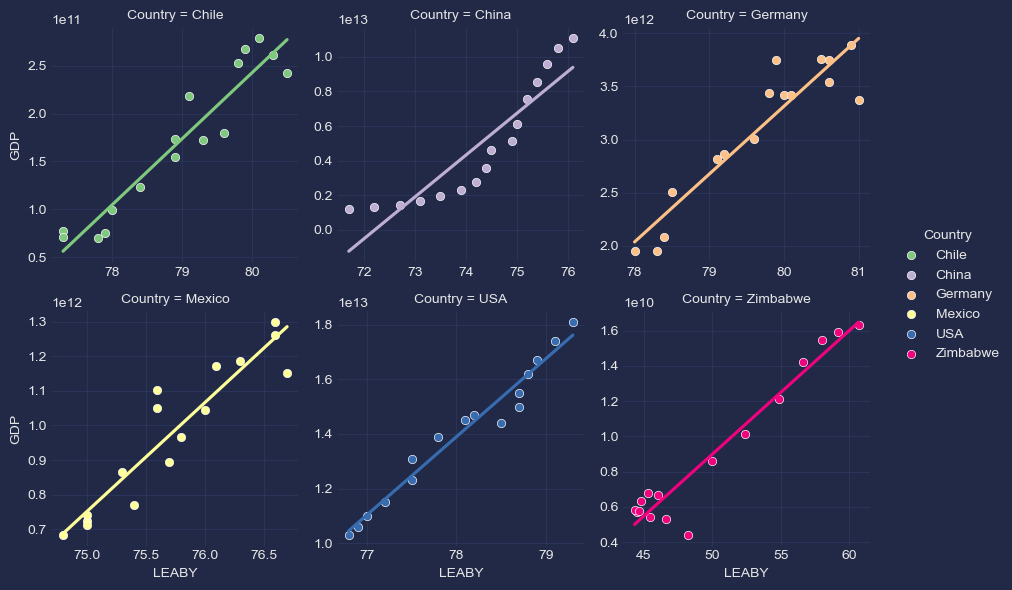

In [91]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False, palette='Accent')
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

graph.map(sns.regplot, "LEABY", "GDP", scatter=False, ci=None)
plt.show()

## 💹Correlation and Relation 


#### 🟡 After analyzing the same graph with a regression line the following observation has been made:

- it is now clear that a linear correlation could be present. 
- according to the figure,  it might be a moderate-weak correlation.
- the line does not always fit, in some cases such as Zimbabwe and China, the points barely fit the reg line

### Correlation Coefficient and Relation Testing.

Correlation matrix:

             GDP     LEABY
GDP    1.000000  0.343207
LEABY  0.343207  1.000000

 p value: 0.0006187129569469811


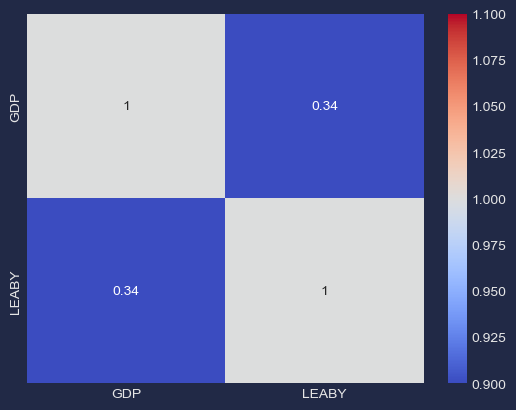

In [53]:
# calculate the correlation
corr_matrix = df[['GDP','LEABY']].corr()
print('Correlation matrix:\n\n',corr_matrix)

#calculate again using pearson's method
corr_gdp_leaby_mean, p = pearsonr(df.LEABY, df.GDP)
#print the p value 
print('\n',f'p value:', p)

# visualize the correlation(if exsist)
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', vmin=1, vmax=1)#cmap='coolwarm'
plt.style.use('code/dark.mplstyle')
plt.show()


According to Pearson's coefficient and the resulting heatmap, the following analysis was conducted:
 
 - indeed a relation between the GDP and The LEABY variable is present
 - the p variable indicates that there is a moderate correlation between the two variables (0.34)
 this suggests that there is a tendency for these variables to move together in a certain direction, but the relationship is not exceptionally strong.

### 🔗 [Findings and Conclusion]

the project provides a thorough examination of the relationship between GDP and life expectancy at birth across multiple countries. The combination of statistical analyses, visualizations, and correlation testing contributes to a comprehensive understanding of the interplay between economic factors and health outcomes. These findings can be valuable for policymakers, researchers, and stakeholders interested in the socio-economic determinants of life expectancy.
<br></br>

Throughout this project, a CSV file was read and put into a Pandas Dataframe to perform summary statistics and data tidying. After that, several observations were made: 

- According to the given dataset, The GDP and LEABY have increased over the years [2000 - 2015] for all of the six nations. 
- On average, The United States of America had the highest GDP in all of the years while at the same time, the USA was the third highest nation in terms of LEABY following Chille and Germany as the country with the most LEABY.

- a relation was discovered between GDP and The Life Expectancy At Birth rates and the two variables were compared using the '.corr () and the scipy. pearson` coefficient. the result was a 0.34 correlation. 
The positive correlation of 0.34 signifies that as GDP increases, there's a tendency for life expectancy rates to also increase, and vice versa. However, the strength of this relationship is moderate. It's not a weak relationship (which would be closer to zero) nor a strong one (which would be closer to 1

**The presence of a correlation indicates that there is some connection or association between GDP and life expectancy rates. This relationship might be influenced by various factors. For example, higher GDP might lead to better healthcare, education, infrastructure, and living standards, which could contribute to increased life expectancy.**

it is recommended to Gather more data about these factors such as(gender, overall health, age, status..etc for further investigation and to determine whether the correlation indeed exists and how much each factor contributes to that correlation ?.



